# 03 — Inflation and Retail Consumption

## Economic Question
How does inflation interact with retail activity across euro-area economies?

## Motivation
Inflation affects retail demand through:
- Real purchasing power
- Intertemporal substitution
- Consumer uncertainty

Understanding this link is crucial for:
- Demand forecasting
- Interpreting post-crisis dynamics
- Policy-relevant retail analysis

## Objective of This Notebook
1. Study inflation and retail growth jointly
2. Examine correlations and co-movement
3. Quantify the inflation–retail relationship

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
df = pd.read_csv("../data/processed/macro_panel.csv")

df["month_dt"] = pd.to_datetime(df["month"])
df = df.sort_values(["country", "month_dt"]).reset_index(drop=True)

df.head()

,country,month,rti_index,hicp_index,hfce,cci,us_cpi,us_unemployment,us_fed_funds,us_industrial_prod,month_dt
0,AT,2010-01,99.5,108.12,NaN,-4.9,217.488,9.8,0.11,89.3426,2010-01-01
1,AT,2010-02,100.7,108.34,NaN,-4.6,217.281,9.8,0.13,89.6779,2010-02-01
2,AT,2010-03,100.7,109.46,NaN,-8.6,217.353,9.9,0.16,90.2928,2010-03-01
3,AT,2010-04,99.9,109.69,NaN,-5.8,217.403,9.9,0.20,90.5991,2010-04-01
4,AT,2010-05,99.4,109.63,NaN,-9.9,217.290,9.6,0.20,91.8230,2010-05-01


In [3]:
# Retail growth
df["rti_growth"] = (
    df.groupby("country")["rti_index"]
      .pct_change() * 100
)

# Inflation rate (YoY)
df["hicp_yoy"] = (
    df.groupby("country")["hicp_index"]
      .pct_change(12) * 100
)

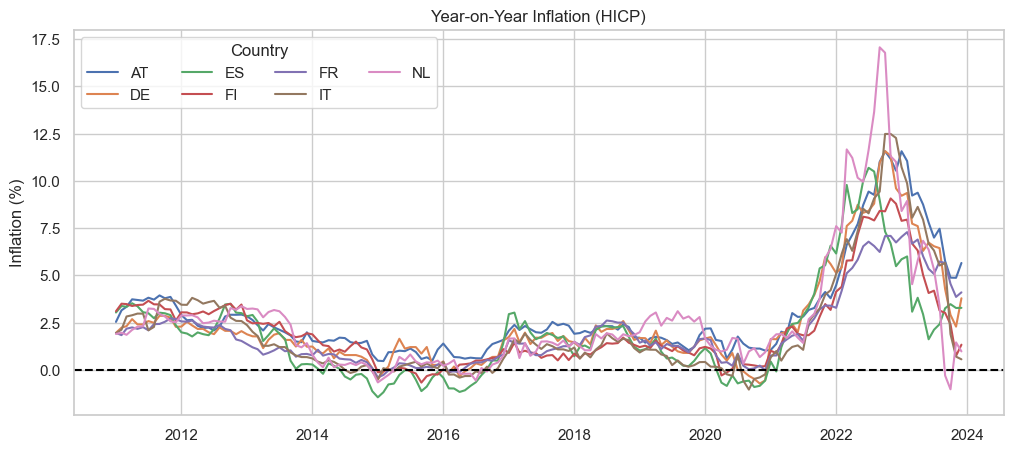

In [4]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=df,
    x="month_dt",
    y="hicp_yoy",
    hue="country",
    linewidth=1.5
)
plt.axhline(0, color="black", linestyle="--")
plt.title("Year-on-Year Inflation (HICP)")
plt.xlabel("")
plt.ylabel("Inflation (%)")
plt.legend(title="Country", ncol=4)
plt.show()

## Inflation Dynamics

- Inflation remains subdued until mid-2021
- Sharp surge during 2022 across all countries
- Strong cross-country synchronization

The inflation shock is clearly **systemic**, not country-specific.

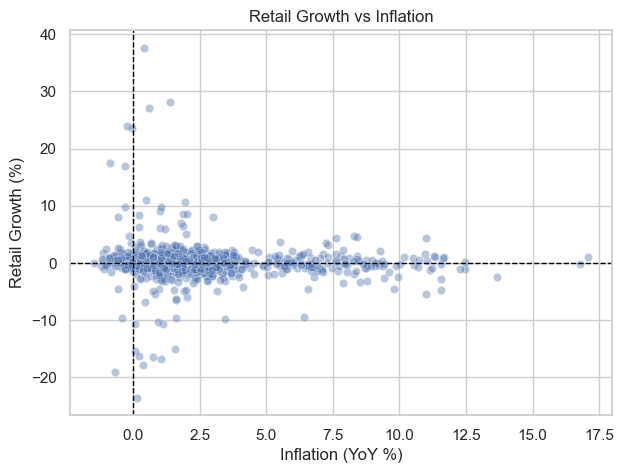

In [5]:
scatter_df = df.dropna(subset=["rti_growth", "hicp_yoy"])

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=scatter_df,
    x="hicp_yoy",
    y="rti_growth",
    alpha=0.4
)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axvline(0, color="black", linestyle="--", linewidth=1)
plt.title("Retail Growth vs Inflation")
plt.xlabel("Inflation (YoY %)")
plt.ylabel("Retail Growth (%)")
plt.show()

## Inflation–Retail Relationship

- Weak linear relationship at low inflation
- Negative association during high-inflation regimes
- Increased dispersion when inflation spikes

This suggests:
- Inflation becomes binding only beyond certain thresholds
- Non-linear effects may be present

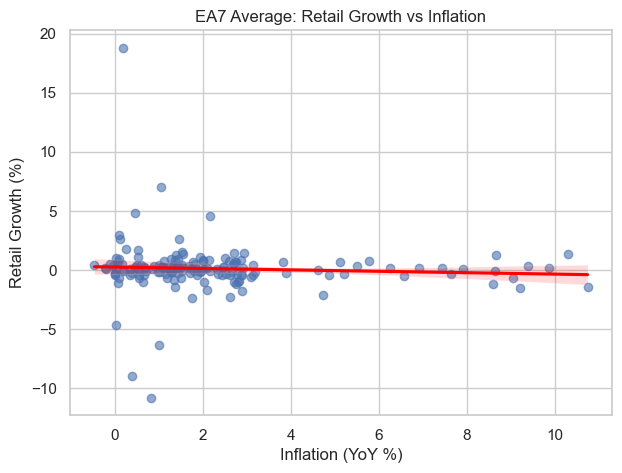

In [6]:
ea7 = (
    df.groupby("month_dt")[["rti_growth", "hicp_yoy"]]
      .mean()
      .dropna()
)

plt.figure(figsize=(7, 5))
sns.regplot(
    data=ea7,
    x="hicp_yoy",
    y="rti_growth",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("EA7 Average: Retail Growth vs Inflation")
plt.xlabel("Inflation (YoY %)")
plt.ylabel("Retail Growth (%)")
plt.show()

## Aggregate Euro-Area Perspective

- Relationship becomes clearer at aggregate level
- Higher inflation correlates with weaker retail growth
- Suggests erosion of real demand

Aggregation reduces noise and reveals macroeconomic structure.

In [7]:
X = ea7["hicp_yoy"].values
y = ea7["rti_growth"].values

X = np.column_stack((np.ones(X.shape[0], dtype=float), np.asarray(X, dtype=float)))
beta = np.linalg.lstsq(X, y, rcond=None)[0]  # type: ignore

beta

array([ 0.23531603, -0.05977333])

## Simple Linear Relationship

Estimated model:
Retail Growth = α + β × Inflation

Findings:
- β < 0 → higher inflation associated with lower retail growth
- Effect is economically meaningful but not dominant

This confirms inflation as a **headwind**, not a sole driver.

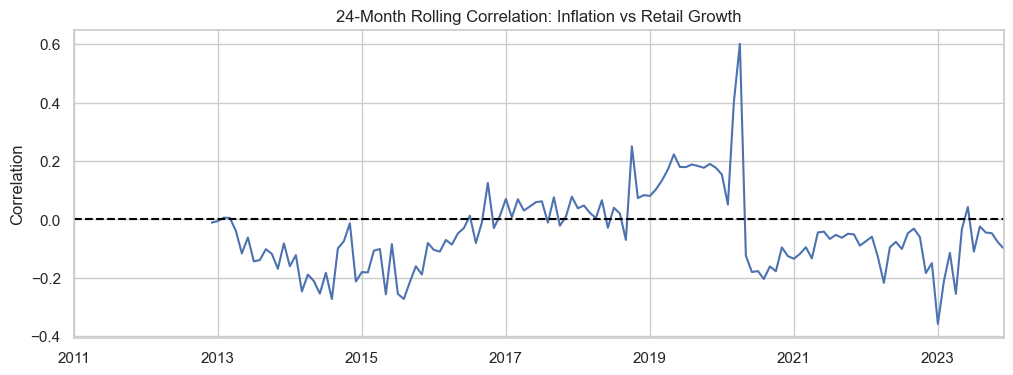

In [8]:
rolling_corr = (
    ea7["rti_growth"]
    .rolling(24)
    .corr(ea7["hicp_yoy"])
)

plt.figure(figsize=(12, 4))
rolling_corr.plot()
plt.axhline(0, color="black", linestyle="--")
plt.title("24-Month Rolling Correlation: Inflation vs Retail Growth")
plt.xlabel("")
plt.ylabel("Correlation")
plt.show()

## Time-Varying Relationship

- Relationship is not stable over time
- Stronger negative correlation during:
  - High-inflation periods
  - Economic stress episodes

This motivates:
- Regime-based analysis
- Structural break detection

## Key Takeaways

- Inflation and retail activity are weakly linked in normal times
- High inflation coincides with demand compression
- Relationship is time-varying and regime-dependent

## Link to Next Notebook
➡️ **Notebook 04 — Consumer Confidence as a Leading Indicator**
We next test whether sentiment predicts retail activity.